['15', '6', '13', '8']
['G11', 'R 3', 'G22', 'G14', 'G31', 'G32', 'G 3', 'G 4', 'G 1']
       svs   epoch               L1              L2            C1  \
0      G28       0  109723767.58548  85499045.24747  20879736.871   
1      G30      30  110178132.27748  85853093.07747  20966198.605   
2      G17      60  112091528.44148  87344053.45647  21330307.535   
3       G4      90  121612801.09545             NaN  23142145.514   
4      G13     120  115719826.19247  90171299.93645  22020748.453   
5       G1     150  117295034.42847  91398728.43945  22320498.807   
6       G7     180  120590131.99947  93966338.32544  22947538.176   
7      G15     210  124762009.80846  97217159.39643  23741420.211   
8      G11     240  116713568.31247  90945644.13745  22209851.255   
9      G28     270  109721416.66148  85497213.34747  20879289.561   
10     G30     300  110232209.73448  85895231.27247  20976489.199   
11     G17     330  112027626.37348  87294259.69847  21318147.327   
12      G4     3

KeyError: 'beta'

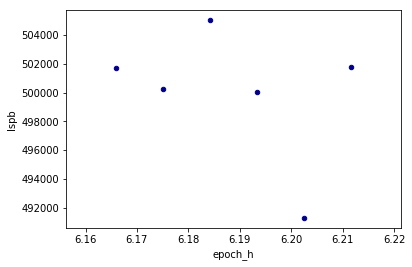

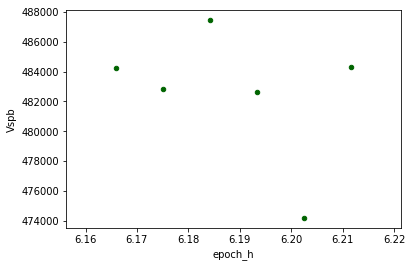

In [5]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
#global time1
filename1 =   os.path.basename('ABD60613a.13o')
#print(filename1)
file1 = open (filename1)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal
for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(len(line))
    
    if ln==16:               #         ['15', '6', '13', '8']
        times = (line[4:24])
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        print(times)
        timeArr = times
    if ln >= 18 :
        param=line.strip()
        #print(len(line))
        #print(line)
        #print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы


        if result :
            #result = re.sub('\s', '', result)
            #print(result)
            arrSvs.append(result)
            #time.sleep(0.5)
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747
            res = re.sub('\s\w\s', '7', param)#zamena otshipaih jstatkov na 7
            res=res.replace(" ", ";")#Замена пробелоа на ; для видимости
    ###########   Problem chto ne odinak kol probelov megdu dannimi #################
            # в данном случае{ L1, нет L2, C1,нет P1, нет P2 возможно будет что есть L2? ytn C1 
            res=res.replace(';;;;;;;;;;;;;;;;;;;',"::")#между L1  и C1 19 пробелов
            res=res.replace(";;;;;;;;;;;;;;;;;;", "::")#7660
            res=res.replace(";;;;;;;;;;;;;;;;;", "::")
            res=res.replace(";;;;;;;;;;;;;;;;", "::")
            res=res.replace(";;;;;;;;;;;;;;;", "::")
            ###### Пробелы между данными которые есть но пробелы разные(5+2 параметров есть
            res=res.replace(";;;;;;;;;;", ";")
            res=res.replace(";;;;;", ";")
            res=res.replace(";;;;", ";")
            res=res.replace(";;;", ";")
            res=res.replace(";;", ";")
            res=res.replace("::", ";NaN;")
            #print(res)
#            res=res.replace("::", ";0;")
#            print(res)
            # проблема c code  не туда заисывается 18
#            res=res.replace(";;;;;", ";")
#            res=res.replace(";;;;", ";")
#            res = res.replace(";;;", ";")
#            res = res.replace(";;", ";")
            res= res.split(";")
            #print(res)
            #param = list(map(float, param))
            test.append(res)

print(arrSvs[2067])#2068
#print(test)

voln=[]
SVS=[]
for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C P1,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
#        print(test[x])
        voln.append(test[x])
#        print(test[x])
#print('5 parametrs',voln)
################################# svs ame time epoch #################
epoch=[]
t=0
for i in range(len(arrSvs)):#  SVS epoch columns
#    print(arrSvs[i])
#    time.sleep(1)
    for ii in range(len(arrSvs[i])):# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])
#        print(arrSvs[i][ii])
        SVS.append(arrSvs[i][ii])
        epoch.append(t)
        t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
#print(SVS)
##print('count SVS simple',len(SVS))
###print(epoch)
#for v in list(voln):
#    for vv in list(v):
#        if len(vv) == 1:
#            v.remove(vv)

arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
#print(arrF)
#print('svs lrn ',arrS)
####print(len(epoch))
#for i in arrF:
#    print(i)
#for i in range(len(arrS)):
#    print(arrS[i])
#for i in range(len(voln)):
#    print(voln[i])
#c_cons = 3e+5      # skorost sveta
c_cons = 299792458
df = pd.DataFrame(voln, columns=['L1','L2','C1','P1','P2'])
#print(df['C1'])
#print(df.head(20))
df.insert(loc=0, column="svs", value=arrS)
df.insert(loc=1, column="epoch", value=epoch)
print(df)
#df.to_csv('test.csv',sep=';')
#for i in range(len(df)):
#    print(df.iloc[i])
##    time.sleep(0.5)
###df = df['svs']=arrS             # 1 VARIANT
#df['L1'] = df['L1'].astype(float)
#df['L2'] = df['L2'].astype(float)
#df['P1'] = df['P1'].astype(float)
#df['P2'] = df['P2'].astype(float)
#df['C1'] = df['C1'].astype(float) # zakralsya probel
#print(df.dtypes)


df = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})# 2 VARIANT
###df['S1','S2']=arrS
##df = df.append(pd.DataFrame(arrS, columns=['S1','S2']),ignore_index=True)
#df['ff']=(1575.43**2)*(1227.60**2) # kombinaciya chastot OLD
df['ff']=(1575.43**2*1227.60**2)/(40.3*(1575.43**2-1227.60**2)) # kombinaciya chastot+ refrakciya

df['epoch_h']= (df['epoch']/3600/10)
df.dropna(inplace=True)
##df['f2^2']=df['F2']**2
##df = df.assign(ff = 1575.43**2)    ##########  operac umnogen
df['Ispb']= df['ff']*(df['P2']-df['P1'])   # prilomlinie koef  0.0248
#df['Ispb']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['P2']-df['P1'])   # prilomlinie koef  0.0248 OLD
##df['Ispb']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['P2']-df['P1'])
#
df['Islc']= df['ff']*(df['L1']*19.04-df['L2']*24.43)# P.S. poprob ukaz v mm cm m
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*19.04-df['L2']*24.43)# P.S. poprob ukaz v mm cm m OLD
##df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*(c_cons/1575.43)-df['L2']*(c_cons/1227.60))
### - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - 
###Ispb-Iscl.std()
#df['Crs2']=((df['Ispb'] - df['Islc'])**2) # (tec Code - tec Fhase)**2
#CrsSum = df['Crs2'].sum()
#CrsCount = df['Crs2'].count()# 18289
##Cr = math.sqrt(CrsSum/CrsCount)
#Cr =np.sqrt(CrsSum/CrsCount)
###Ispb-Iscl.std()
#df['Crs2']=((df['Ispb'] - df['Islc'])) # (tec Code - tec Fhase)
#CrsSum = df['Crs2'].sum()
#CrsCount = df['Crs2'].count()# 18289
#Cr = math.sqrt(CrsSum/CrsCount)
#Cr =np.sqrt(CrsSum**2/CrsCount)
#df['Crs2']=((df['Ispb'] - df['Islc'])**2) # (tec Code - tec Fhase)
#df['CrsA']=df['Crs2']-df['Crs2'].count()# 18289
#CrsSum = df['CrsA'].sum()
#Cr =np.sqrt(CrsSum)
#print(CrsCount)
#print(CrsSum)
#print(Cr)
#df['CrIslc']=df['Islc']+Cr
#f['Crs']=(df['Ispb'] - df['Ispb']).std()


#print(ds['epoch_h'].dtypes)
#df['Vtec']=df['Ispb']*np.cos(np.arctan(6400000*np.cos(80)/(6400000+350000)))

#df['Vtec2']=df['Islc']*np.cos(np.arctan(6400000*np.cos(80)/(6400000+350000)))
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']-df['L2'])
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*(c_cons/1575.43)-df['L2']*(c_cons/1227.60))
#ds = df
##print(df.dtypes)
ds = (df.loc[df['svs'] == 'G29'])
#ds = ds.loc[(ds['epoch_h'] > 6) & (ds['epoch_h'] < 8)]
ds = ds.loc[(ds['epoch_h'] >= 6.156667) & (ds['epoch_h'] < 6.220)]# c 6 часа по 8 угол 80
ds['Vspb']=ds['Ispb']*(np.cos(np.arcsin(6371*np.sin(80*0.9782)/(6371+450))))
#ds['Vspb']=ds['Ispb']*(np.cos(np.arctan(6400*np.cos(80)/(6000+450)))) #old
ds['Vslc']=ds['Islc']*np.cos(np.arctan(6400*np.cos(80)/(6000+450)))
DCBs = 2.153      
MF= (np.cos(np.arcsin((6371*sin(80))/(6371+450))))**-1
ds['VIspb'] = ds['Vspb']*MF
#ds['DCBr'] =ds['ff']*ds['Ispb']-(ds['P2']-ds['P1']/c_cons)-DCBs
ds['DCBr'] =ds['ff']*ds['Vspb']*MF-(ds['P2']-ds['P1']/c_cons)-DCBs

#dy = ds['Vtec']*np.argsin(((6371*506)/6371)*np.sin(0.9782*80))
 # STEC*cos(  argsin( R/(R+H) * sin(a*z)  )    )
   # H = 506·7 km and α = 0·9782, when using R = 6371 km and assuming a maximum zenith distance of 80°
#ds =  df[df['svs'].isin(['G29', 'G17','G21','G1','G3','G10','G11'])]
##ds=ds[['epoch','Islc']]
#ds = ds[130:571]
#print(ds)
##fig= figure (figsize=(9, 5), dpi=100, facecolor='#FFFFff', edgecolor='k')
##ax = fig.add_axes([0.1, 0.1,  1, 0.8], polar=False)
##box = ax.get_position()
##ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#colors = df
#norm=mptl.colors.Normalize(min(colors), max(colors))
##ds['Islc'].plot()
#df['Cstd'].plot.scatter(x='epoch_h',y='Vtec',c='DarkRed')
#ds.plot.scatter(x='epoch_h',y='Islc',c='DarkBlue')
ds.plot.scatter(x='epoch_h',y='Ispb',c='DarkBlue')
ds.plot.scatter(x='epoch_h',y='Vspb',c='DarkGreen')

#ds.plot.scatter(x='epoch_h',y='Vslc',c='DarkGreen')
#ds.plot.scatter(x='epoch_h',y='CrIslc',c='DarkRed')
##ds.plot(subplots=True, x='epoch_h',y='Islc',figsize=(9, 8))
#df['Tenant'].replace('', np.nan, inplace=True) # замена пустых ячеек на NaN
#ds.dropna(thresh=7)
#print(ds)
#ds.to_csv('test.csv',sep=';')
#ds.plot(subplots=True, x='epoch_h',y='Islc',figsize=(8, 6), sharex=False)
#ds.plot(subplots=True, x='epoch_h',y='Islc',figsize=(8, 6), sharex=False)
# ds.plot(subplots=True, x='epoch_h',y='Cstd',figsize=(10, 6), sharex=False)
##mplot = plt.scatter (df['Ispb'], df, c=colors,  norm=norm,  s=3.5, cmap=mptl.cm.hsv, lw=0)
#    for i in range(0,len(oaziSvs)):
plt.show()
#df['ff']= (df['F1']**2)

### l1 1575,42
####l2 1227,60
####19,04 см и 24,43 см.
#lamda =c_constant/f1
#ff = (1575,42*1227,60)**2
#ff = 0.0248*ff/(1575,42**2-1227,60**2)*(P2-P1)
#ff = 0.0248*ff/(1575,42**2-1227,60**2)*(L1*lamda-L2*lamda2)
##def I=phas_mesurme(L1,L2,f1,f2,delta)
##c_constant = 3e+5
##ff = (f1*f2)^2
##ff = 0.0248*ff/(f1*f1-f2*f2)
##lamd1 = c_const/f1
##lamd2 = c_const/f2
#if nargin ==5:
#    I = ff*(I + delta)
#elif nargin == 4:
#    I ==ff*I
#def I = code_phas_mesur(L1,C1,f1,delta)
#c_const = 3e+5
#ff = 0.0248*f1**2
#lamd1 = c_const/f1
#    if nargin == 4:
#I = ff*(C1 -L1*lamd1 + delta)
#    elif nargin ==3:
#        I = ff*(C1-L1*lamd1)


In [73]:
#MF = np.cos(np.arcsin(506*np.sin(80)))**-1
MF= np.cos(np.arcsin((6371*sin(80))/(6371+506)))**-1
#Ispb = 501675.356941
#Vspb = 498692.827961
